In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')

# Wine Quality

## Introduction

This material is adopted from [Here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see Cortez et al., 2009, [Web Link](http://www3.dsi.uminho.pt/pcortez/wine/)).

## Attribute Information

- **fixed acidity**
- **volatile acidity**
- **citric acid**
- **residual sugar**
- **chlorides**
- **free sulfur dioxide**
- **total sulfur dioxide**
- **density**
- **pH**
- **sulphates**
- **alcohol**
- **quality** (score between 0 and 10)

## Load the Data

In [2]:
red_data = pd.read_csv('datasets/winequality-red.csv', sep=';')
white_data = pd.read_csv('datasets/winequality-white.csv', sep=';')

In [3]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Binding

In [5]:
red_data['variant'] = 'red'
white_data['variant'] = 'white'
data = pd.concat([red_data, white_data], axis=0)
data = data.reset_index().drop('index', axis=1)

In [6]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
5269,6.2,0.21,0.18,11.6,0.044,61.0,155.0,0.99655,3.14,0.52,9.4,6,white
6121,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,6,white
186,7.4,0.39,0.48,2.0,0.082,14.0,67.0,0.99720,3.34,0.55,9.2,5,red
159,6.8,0.60,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3,6,red
243,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red


I bind these 2 datasets because they have the **same structure**. I will check if the variant contributes to the quality of the wine.

## Exploratory Data Analysis

In [7]:
from fd_lib.overview import Overview
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### General Information

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  variant               6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
data.isnull().sum().sum()

0

Observation shows that:
- There are some features that are very high and very far from the mean.
- All columns are numeric features, except variant.
- There is no value missing value.

### Correlation

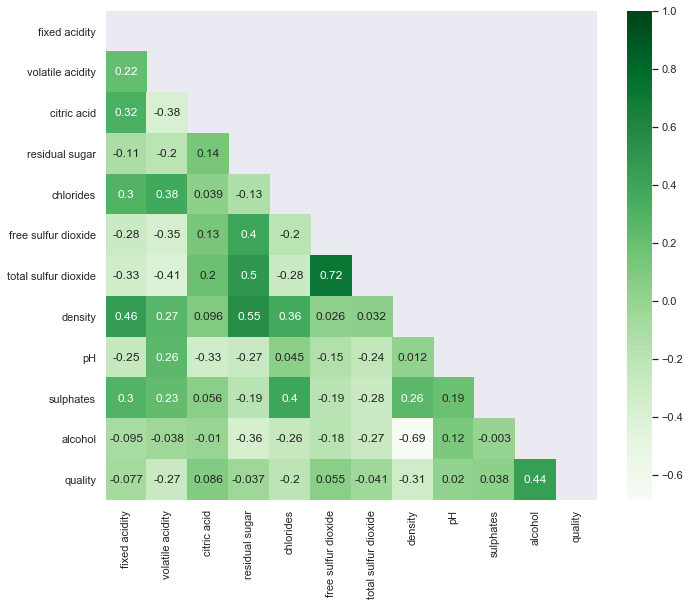

In [11]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap='Greens', mask=mask, annot=True);

**Alcohol** appears to be a feature that is highly correlated with wine quality.

### Outliers and Distribution of _Quality_

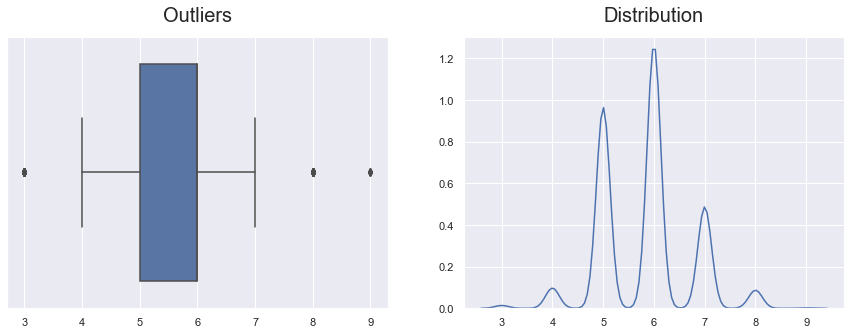

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(ax=ax1, x='quality', data=data)
ax1.set_title('Outliers', size=20, pad=15)
ax1.set_xlabel('')

sns.distplot(ax=ax2, a=data['quality'], hist=False)
ax2.set_title('Distribution', size=20, pad=15)
ax2.set_xlabel('')

plt.show()

In [13]:
cleaned_data = data[(data['quality'] >= 4) & (data['quality'] <= 7)]

In [14]:
cleaned_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
5674,5.7,0.25,0.26,12.5,0.049,52.5,120.0,0.99691,3.08,0.45,9.4,6,white
2303,5.6,0.25,0.26,3.6,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,white
4910,6.0,0.19,0.29,1.1,0.047,67.0,152.0,0.99160,3.54,0.59,11.1,7,white
4930,6.8,0.23,0.32,8.6,0.046,47.0,159.0,0.99452,3.08,0.52,10.5,6,white
3382,8.7,0.45,0.40,1.5,0.067,17.0,100.0,0.99570,3.27,0.57,10.1,6,white


There are many more normal wines than excellent or poor ones. Removing the minority will make the model **performs** better. But removing these will make the model fail in predicting that minority because it will **always predict normal quality**. The quality is normally distributed.

### Insight

In [15]:
low_quality_wine = Overview(data, data['quality'] == 3, only_outliers=True)

In [16]:
first_index = low_quality_wine.get_index(0)
low_quality_wine.get_frame(first_index)

,Feature,Value,Mean
0,fixed acidity,11.600000,7.215307
1,citric acid,0.660000,0.318633


In [17]:
high_quality_wine = Overview(data, data['quality'] == 9, only_outliers=False)

In [18]:
first_index = high_quality_wine.get_index(0)
high_quality_wine.get_frame(first_index)

,Feature,Value,Mean
0,fixed acidity,9.100000,7.215307
1,citric acid,0.450000,0.318633
2,residual sugar,10.600000,5.443235
3,chlorides,0.035000,0.056034
4,density,0.997000,0.994697


## Modeling

In [19]:
# Model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time as t
# Feature Engineering
from fd_lib.feature_engineering import BestPair
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Scoring
from sklearn.metrics import mean_absolute_error as MAE

The dataset has a lot of features and outliers but I have removed some of the extreme outliers. It's interesting to use a model that can handle multiple features and outliers. These are the models I am considering:
- **Ridge**, multicollinearity is present in the dataset
- **Lasso**, automatically does feature selection.
- **SVR**, performs well in high-dimensional feature space and robust to outliers.
- **DecisionTreeRegressor**, can handle non-linear data and robust to outliers.
- **RandomForestRegressor**, ensemble version of Decision Tree.
- **XGBRegressor**, sophisticated version of Random Forest.

### Train Test Split

In [20]:
X = cleaned_data.drop('quality', axis=1)
y = cleaned_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Features

#### Correlation

In [21]:
BestPair(X, y, how='all').mold()

[Distance]          sulphates & alcohol     | 0.432
[Distance]   volatile acidity & chlorides   | -0.271


The calculated pairs **don't have a higher correlation** than the original, I wouldn't use them.

#### Pipeline

In [22]:
features = Pipeline([
    ('encode', ColumnTransformer([
        ('onehot', OneHotEncoder(), ['variant'])
    ], remainder='passthrough'))
])

### Model Selection

In [23]:
estimators = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}

In [24]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)
Xt = features.fit_transform(X)
for name, estimator in estimators.items():
    start = t.time()
    scores = cross_val_score(estimator, Xt, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    finish = t.time()
    print('{}: {:.3f} in {:.3f}s'.format(name, scores.mean(), finish - start))

Ridge: -0.524 in 3.041s
Lasso: -0.641 in 0.176s
SVR: -0.569 in 23.960s
DT: -0.406 in 0.660s
RF: -0.386 in 33.775s
XGB: -0.489 in 3.395s


**RandomForest** appears to be performing **the best**, but it takes relatively **longer time** to train. There will be a **trade off**.

### Fitting Model

In [25]:
est = Pipeline([
    ('features', features),
    ('regressor', RandomForestRegressor())
])
est.fit(X_train, y_train);

I did the hyperparameters tuning previously but it made the model's performance **worse**.

### Scoring

In [26]:
pd.DataFrame({'MAE': [MAE(y_train, est.predict(X_train)),
                      MAE(y_test, est.predict(X_test))],
              'R2': [est.score(X_train, y_train),
                     est.score(X_test, y_test)]},
             index=['Train', 'Test'])

,MAE,R2
Train,0.147398,0.931473
Test,0.391882,0.529225


In [27]:
pd.DataFrame({'Predict': est.predict(X_test).round(0).astype(int), 'True': y_test}).sample(5)

,Predict,True
5543,6,6
4212,5,5
2118,6,5
1802,7,6
824,6,5


The **Mean Absolute Error** is **below 0.5**, meaning that rounding will not affect the value. The predicted values are also very close to the true values, most of them even the same.

## Feature Importances

In [28]:
columns = np.delete(cleaned_data.columns, [11])
scores = np.append(
    est.named_steps['regressor'].feature_importances_[2:],
    np.average(
        est.named_steps['regressor'].feature_importances_[:2],
        weights=[len(red_data), len(white_data)]
    )
)

I did OneHotEncoding on the variant, it will produce 2 features because there are **2 classes** in the variant. I take the **weighted mean** of these values.

In [29]:
sorted_feature_importances = sorted(zip(columns, scores), key=lambda item: -item[1])

columns = []
scores = []
for item in sorted_feature_importances:
    columns.append(item[0])
    scores.append(item[1])

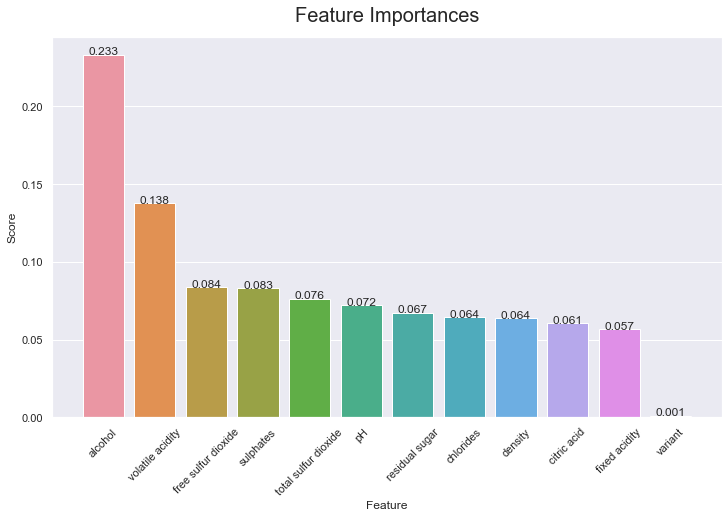

In [30]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(ax=ax, x=columns, y=scores)
ax.set_title('Feature Importances', size=20, pad=15)
ax.set_xlabel('Feature')
ax.set_ylabel('Score')

for index, score in enumerate(scores):
    ax.text(index, score, round(score, 3), ha='center')

plt.xticks(rotation=45)
plt.plot();

The chart shows that **alcohol** is the feature that most determines **wine quality** followed by **volatile acidity**. **Volatile acidity** *(VA)* is a measure of the wine's gaseous acids that contributes to the smell and taste of vinegar in wine.

[Read More](https://extension.psu.edu/volatile-acidity-in-wine)

## Conclusion

- **Alcohol** and **volatile acidity** are the most important factors determining **wine quality** while **variant** doesn't.
- I chose **RandomForestRegressor** for this mini-project for the following reasons besides the drawback is it requires quite a **long time** to train.
 - **Robust to outliers**, meaning that it is not sensitive to outliers.
 - **Does a good job**, meaning that the predicted value is very close to the true value.